# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [16]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
%matplotlib inline

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [17]:
ls

CONTRIBUTING.md    README.md          index_files/
LICENSE.md         index.ipynb        weight-height.csv


In [21]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

#male stats
print(f'Male Height mean: {male_df.Height.mean()}')
print(f'Male Height sd: {male_df.Height.std()}')
print(f'Male Weight mean: {male_df.Weight.mean()}')
print(f'Male Weight sd: {male_df.Weight.std()}')

#female stats
print(f'Female Height mean: {female_df.Height.mean()}')
print(f'Female Height sd: {female_df.Height.std()}')
print(f'Female Weight mean: {female_df.Weight.mean()}')
print(f'Female Weight sd: {female_df.Weight.std()}')


Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

Text(0, 0.5, 'Frequency')

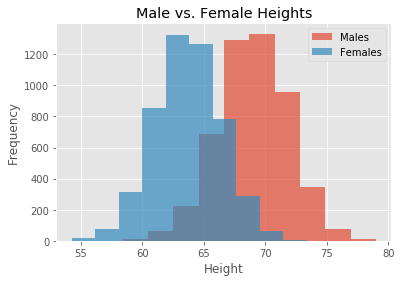

In [28]:
# Your code here
plt.hist(male_df['Height'], bins=10, alpha=0.7, label='Males')
plt.hist(female_df['Height'], bins=10, alpha=0.7, label='Females')
plt.legend()
plt.title('Male vs. Female Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

In [29]:
# Record your observations - are these inline with your personal observations?
# Males tend to have higher height values than females, with a mean of 69 vs. Female mean height of 63
# Males tend to have slightly higher variance, with a std of 2.86 vs. Females of 2.69
# Both male and female heights seem to be normally distributed
# Females have a slightly higher peak, signifying that more concentration around that peak, men are more spread

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

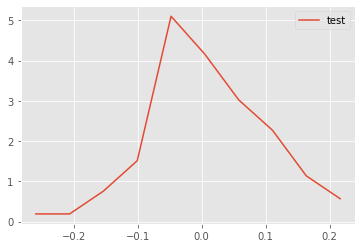

In [40]:
def density(x):
    n, bins = np.histogram(x, bins=10, density=1) #n is hist values; bins is bin positions along x axis
    pdfx = np.zeros(n.size) #initialize numpy array according to # of bins
    pdfy = np.zeros(n.size) #initialize numpy array according to # of bins
    
    for k in range(n.size):
        pdfx[k] = 0.5 * (bins[k] + bins[k+1])
        pdfy[k] = n[k]
    
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

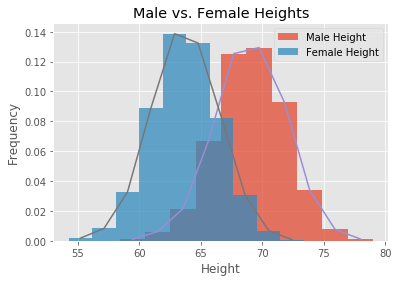

In [62]:
# Your code here 
# Create histograms
male_df['Height'].plot.hist(bins=10, density=True, alpha=0.75, label='Male Height')
female_df['Height'].plot.hist(bins=10, density=True, alpha=0.75, label='Female Height')
plt.legend()

x, y = density(male_df['Height'])
plt.plot(x, y)

x, y = density(female_df['Height'])
plt.plot(x, y)

plt.title('Male vs. Female Heights')
plt.xlabel('Height')
plt.show()

## Repeat the above exercise for male and female weights

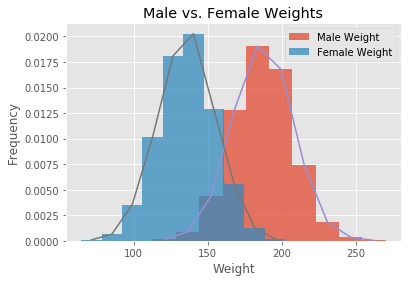

In [64]:
# Your code here 
male_df['Weight'].plot.hist(bins=10, density=True, alpha=0.75, label='Male Weight')
female_df['Weight'].plot.hist(bins=10, density=True, alpha=0.75, label='Female Weight')
plt.legend()

x, y = density(male_df['Weight'])
plt.plot(x, y)

x, y = density(female_df['Weight'])
plt.plot(x, y)

plt.title('Male vs. Female Weights')
plt.xlabel('Weight')
plt.show()

## Write your observations in the cell below

In [65]:
# Record your observations - are these inline with your personal observations?
# both male and female weights appear to be relatively normally distributed
# male weights tend to be higher than female weights
# male weights are more spread, shown by higher peak of female weights

# What is the takeaway when comparing male and female heights and weights?
# males tend to have higher weights and heights than females.  Additionally,
# male heights and weights tend to be more spread than females.
# there is more overlap between men and women on height than there is on weight;
# weight is a better differentiator between the two 

## Repeat the above experiments in seaborn and compare with your results

In [66]:
import seaborn as sns

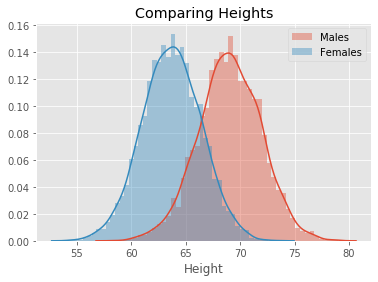

In [70]:
# Code for heights here
sns.distplot(male_df['Height'], label='Males')
sns.distplot(female_df['Height'], label='Females')
plt.title('Comparing Heights')
plt.xlabel('Height')
plt.legend()
plt.show()

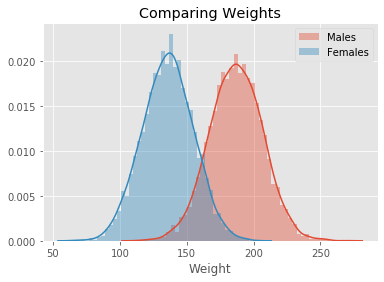

In [73]:
# Code for weights here
sns.distplot(male_df['Weight'], label='Males')
sns.distplot(female_df['Weight'], label='Females')
plt.title('Comparing Weights')
plt.xlabel('Weight')
plt.legend()
plt.show()

In [74]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# using seaborn is significantly easier from a coding perspective, requiring fewer lines
# the other difference is that when estimating using interpolation, the bin size has a large influence
# on our PDF

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.